In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import Levenshtein as lev
import itertools
import upsetplot
from random import shuffle
import upsetplot

Following 3 cells from "AD Variant visualization..." notebook

In [2]:
# Loading in all variants
#am_bottom_10 = pd.read_csv("../output/caitlin_experiment/am_bottom10_vars.csv", index_col = 0)
#am_top_10 = pd.read_csv("../output/caitlin_experiment/am_top10_vars.csv", index_col = 0)
clinvar = pd.read_csv("../output/caitlin_experiment/clinvar_vars.csv", index_col = 0)
cosmic = pd.read_csv("../output/caitlin_experiment/cosmic_vars.csv", index_col = 0)
pt_vars = pd.read_csv("../output/caitlin_experiment/patient_vars.csv", index_col = 0)
gnomad = pd.read_csv("../output/caitlin_experiment/gnomad_vars.csv", index_col = 0)

concat_vars = pd.concat([clinvar, cosmic, pt_vars, gnomad])
all_muts = concat_vars[["Gene Name", "Mutant Sequence", "Protein Change"]].drop_duplicates()
all_muts

,Gene Name,Mutant Sequence,Protein Change
0,NKX2-2_AD,AQDLAAATFQAGIPFSAYSAQSLQYMQYNAQYSSASTPQYPTAHPL...,p.His244Tyr
1,NKX2-2_AD,AQDLAAATFQAGIPFSAYSVQSLQHMQYNAQYSSASTPQYPTAHPL...,p.Ala239Val
2,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Gly226Ser
3,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Gly226Arg
4,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Gly226Cys
...,...,...,...
1933,PAX5_AD,GRDFASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Phe
1934,PAX5_AD,GRDSASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Ser
1935,PAX5_AD,GPDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Pro
1937,PAX5_AD,GCDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Cys


In [3]:
all_muts["clinvar"] = all_muts["Mutant Sequence"].isin(clinvar["Mutant Sequence"])#.astype(int)
all_muts["cosmic"] = all_muts["Mutant Sequence"].isin(cosmic["Mutant Sequence"])#.astype(int)
all_muts["pt_vars"] = all_muts["Mutant Sequence"].isin(pt_vars["Mutant Sequence"])#.astype(int)
all_muts["gnomad"] = all_muts["Mutant Sequence"].isin(gnomad["Mutant Sequence"])#.astype(int)
all_muts

,Gene Name,Mutant Sequence,Protein Change,clinvar,cosmic,pt_vars,gnomad
0,NKX2-2_AD,AQDLAAATFQAGIPFSAYSAQSLQYMQYNAQYSSASTPQYPTAHPL...,p.His244Tyr,True,True,True,True
1,NKX2-2_AD,AQDLAAATFQAGIPFSAYSVQSLQHMQYNAQYSSASTPQYPTAHPL...,p.Ala239Val,True,True,True,True
2,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Gly226Ser,True,False,True,True
3,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Gly226Arg,True,False,False,True
4,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Gly226Cys,True,False,True,True
...,...,...,...,...,...,...,...
1933,PAX5_AD,GRDFASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Phe,False,False,False,True
1934,PAX5_AD,GRDSASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Ser,False,False,False,True
1935,PAX5_AD,GPDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Pro,False,False,False,True
1937,PAX5_AD,GCDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Cys,False,False,False,True


In [4]:
var_lists = ["clinvar", "cosmic", "pt_vars", "gnomad"]
var_lists

['clinvar', 'cosmic', 'pt_vars', 'gnomad']

In [5]:
sets_long = all_muts[var_lists]
sets_long = sets_long.reset_index(drop = True)
sets_long

,clinvar,cosmic,pt_vars,gnomad
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,True,False,False,True
4,True,False,True,True
...,...,...,...,...
2514,False,False,False,True
2515,False,False,False,True
2516,False,False,False,True
2517,False,False,False,True


In [6]:
sets_obs = pd.DataFrame(sets_long.value_counts())
sets_obs = sets_obs.rename(columns = {"count" : "obs"})
print(sum(sets_obs["obs"]))
sets_obs

2519


obs
clinvar cosmic pt_vars gnomad      
False   False  False   True    1371
        True   False   False    402
        False  True    True     304
        True   False   True     153
        False  True    False    143
        True   True    True      67
True    False  False   True      18
                       False     17
               True    True      16
False   True   True    False     14
True    True   True    True       7
        False  True    False      4
        True   False   True       3

In [7]:
sets_obs.loc[False, False, False, True]

obs    1371
Name: (False, False, False, True), dtype: int64

In [8]:
combos = []
options = [True, False]

for pos1 in options:
    for pos2 in options:
        for pos3 in options:
            for pos4 in options:
                combos.append((pos1, pos2, pos3, pos4))

combos

[(True, True, True, True),
 (True, True, True, False),
 (True, True, False, True),
 (True, True, False, False),
 (True, False, True, True),
 (True, False, True, False),
 (True, False, False, True),
 (True, False, False, False),
 (False, True, True, True),
 (False, True, True, False),
 (False, True, False, True),
 (False, True, False, False),
 (False, False, True, True),
 (False, False, True, False),
 (False, False, False, True),
 (False, False, False, False)]

In [9]:
for combo in combos:
    if combo not in sets_obs.index:
        sets_obs.loc[combo] = 0   

In [10]:
print(len(sets_obs))
sets_obs

16


obs
clinvar cosmic pt_vars gnomad      
False   False  False   True    1371
        True   False   False    402
        False  True    True     304
        True   False   True     153
        False  True    False    143
        True   True    True      67
True    False  False   True      18
                       False     17
               True    True      16
False   True   True    False     14
True    True   True    True       7
        False  True    False      4
        True   False   True       3
               True    False      0
               False   False      0
False   False  False   False      0

In [11]:
# Random shuffles

shuffle_results = sets_obs.copy(deep = True)

# Storing expecs in df
shuffled_counts = pd.DataFrame()

for i in range(10000):
    new_df = pd.DataFrame()
    for var_list in var_lists:
        new_df[var_list] = np.random.choice(sets_long[var_list], len(sets_long), replace=False)

    new_df = pd.DataFrame(new_df.value_counts())
    if sum(new_df["count"]) != sum(sets_obs["obs"]):
        print("error")
    new_df = new_df.rename(columns = {"count" : "shuffle_" + str(i + 1)})

    shuffle_results = pd.merge(shuffle_results, new_df, left_index=True, right_index=True, how = "left")

shuffle_results

obs  shuffle_1  shuffle_2  shuffle_3  \
clinvar cosmic pt_vars gnomad                                          
False   False  False   True    1371       1106       1073     1108.0   
        True   False   False    402        130        114      120.0   
        False  True    True     304        313        319      302.0   
        True   False   True     153        360        376      362.0   
        False  True    False    143         87         82       93.0   
        True   True    True      67        105        122      109.0   
True    False  False   True      18         32         31       32.0   
                       False     17          6          9        6.0   
               True    True      16         10          8       11.0   
False   True   True    False     14         35         19       39.0   
True    True   True    True       7          2          2        1.0   
        False  True    False      4          1          2        NaN   
        True   False   True       3         11          8       14.0   
               True    False      0          2          1        NaN   
               False   False      0          1          4        1.0   
False   False  False   False      0        318        349      321.0   

                               shuffle_4  shuffle_5  shuffle_6  shuffle_7  \
clinvar cosmic pt_vars gnomad                                               
False   False  False   True         1091     1120.0       1085     1076.0   
        True   False   False         109      115.0        103      114.0   
        False  True    True          313      289.0        309      326.0   
        True   False   True          399      365.0        392      389.0   
        False  True    False          95       96.0        100       92.0   
        True   True    True           83      114.0        102       99.0   
True    False  False   True           31       25.0         33       27.0   
                       False           7       12.0          7        9.0   
               True    True           13       13.0          6        8.0   
False   True   True    False          44       37.0         32       26.0   
True    True   True    True            3        5.0          2        NaN   
        False  True    False           3        NaN          2        3.0   
        True   False   True            6        8.0         10       14.0   
               True    False           1        1.0          2        1.0   
               False   False           1        1.0          3        3.0   
False   False  False   False         320      318.0        331      332.0   

                               shuffle_8  shuffle_9  ...  shuffle_9991  \
clinvar cosmic pt_vars gnomad                        ...                 
False   False  False   True       1098.0     1090.0  ...          1100   
        True   False   False       118.0      117.0  ...           107   
        False  True    True        314.0      321.0  ...           304   
        True   False   True        378.0      368.0  ...           377   
        False  True    False        99.0       81.0  ...            90   
        True   True    True        104.0      104.0  ...           109   
True    False  False   True         32.0       31.0  ...            29   
                       False        12.0        6.0  ...            11   
               True    True          2.0        9.0  ...             8   
False   True   True    False        31.0       38.0  ...            37   
True    True   True    True          1.0        1.0  ...             4   
        False  True    False         4.0        NaN  ...             1   
        True   False   True         10.0       15.0  ...             8   
               True    False         NaN        1.0  ...             2   
               False   False         4.0        2.0  ...             2   
False   False  False   False       312.0      335.0  ...           330   

               

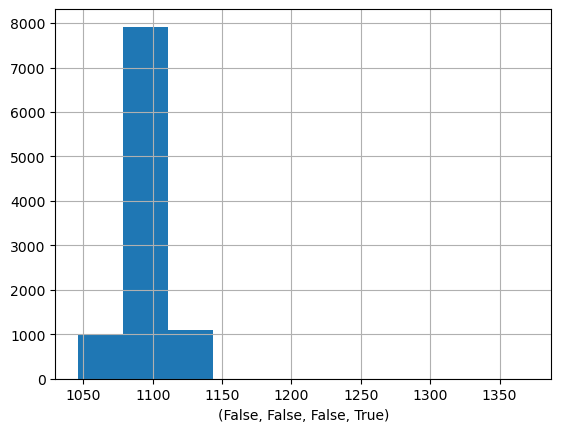

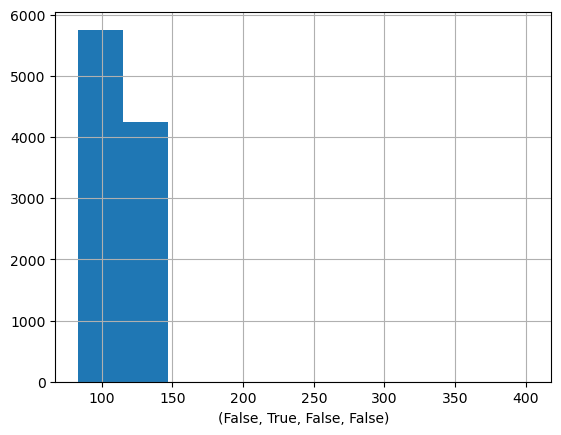

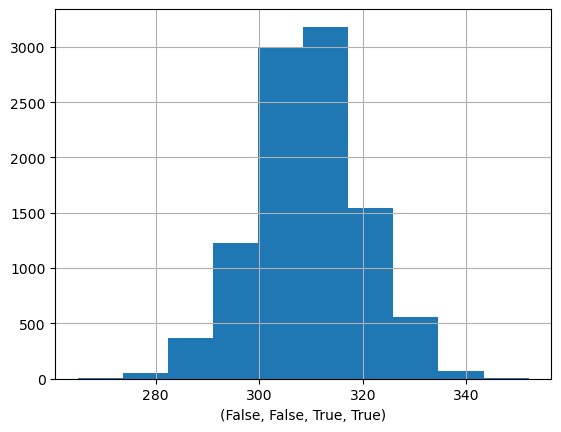

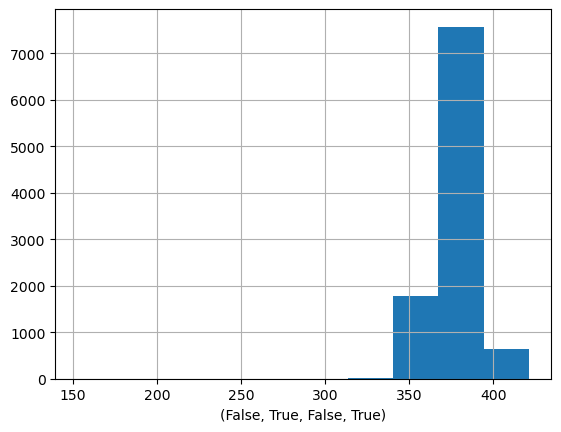

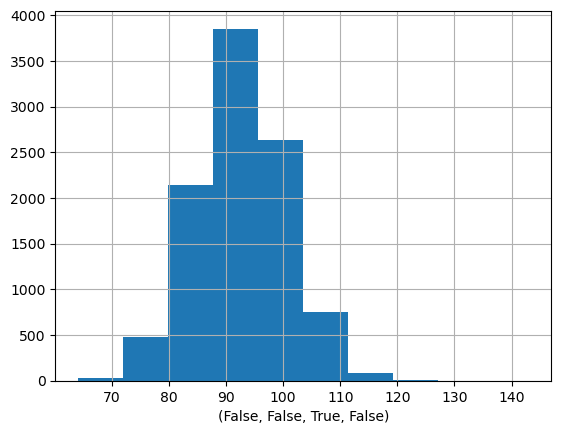

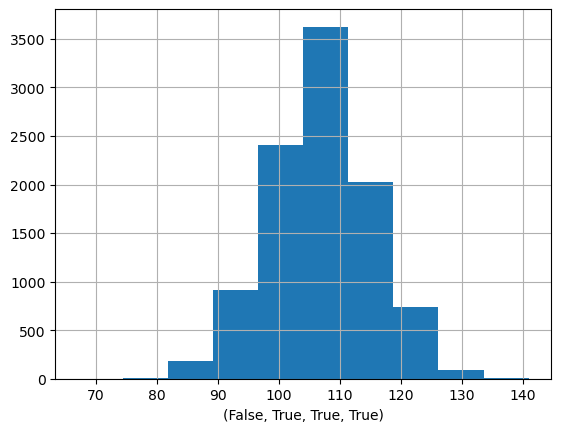

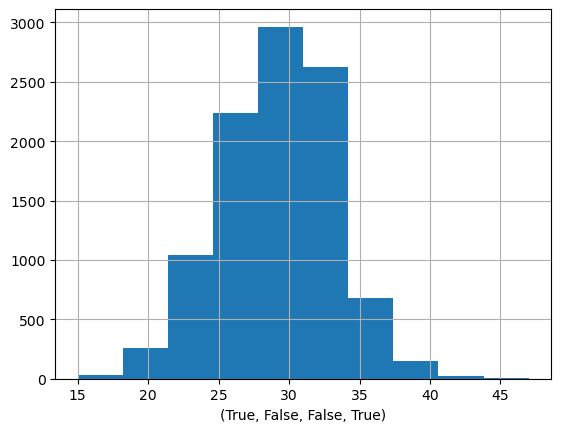

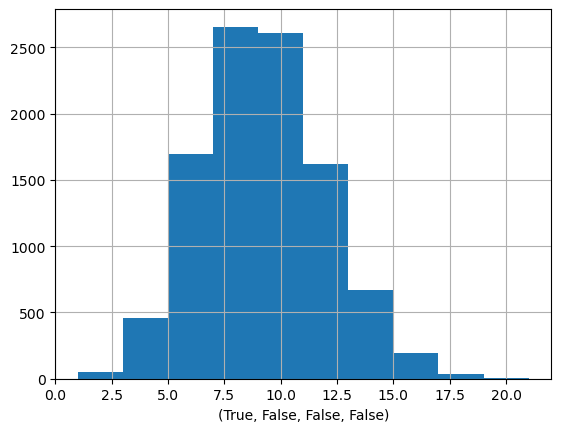

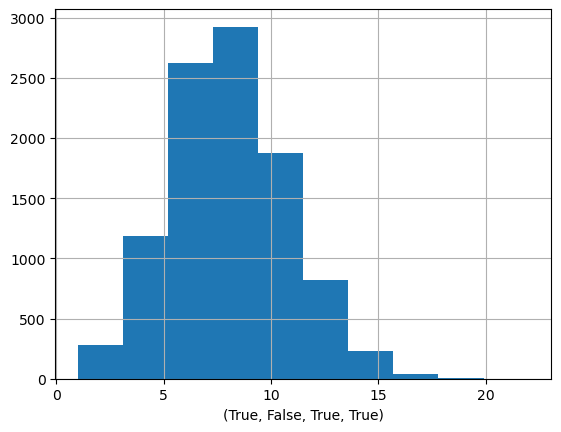

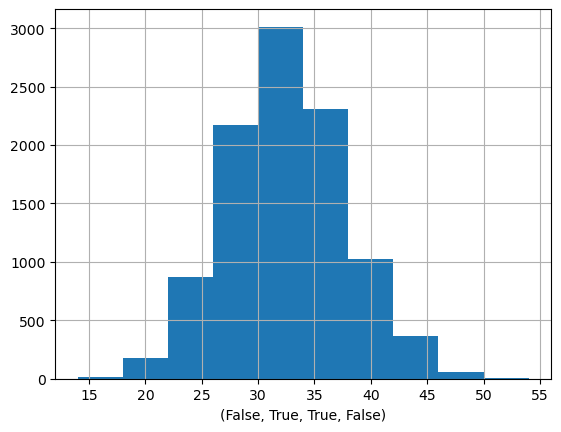

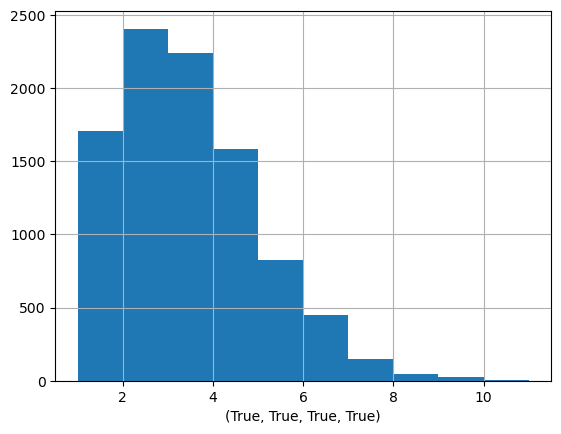

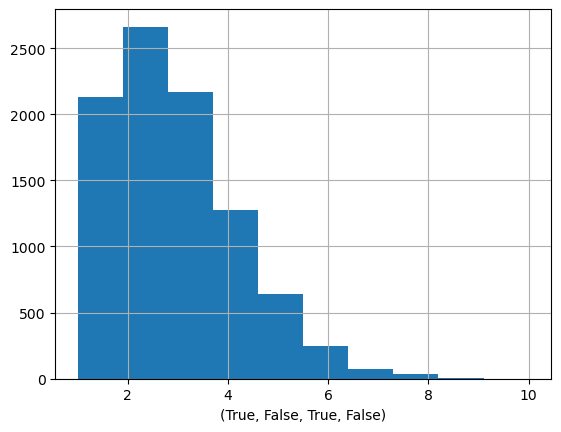

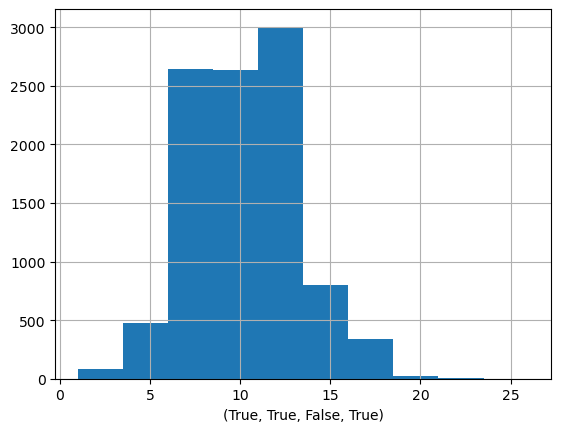

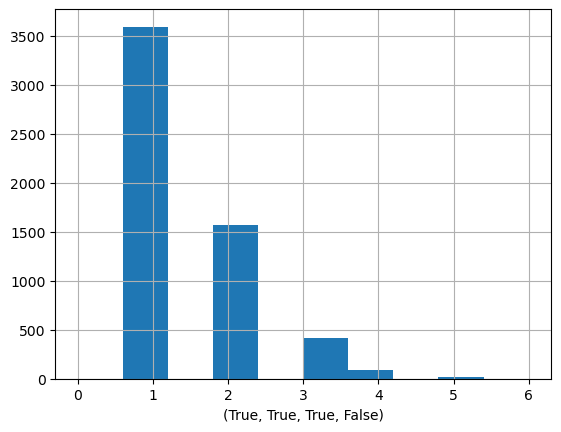

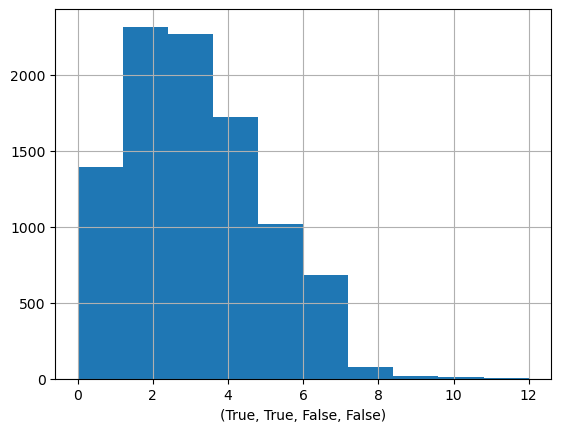

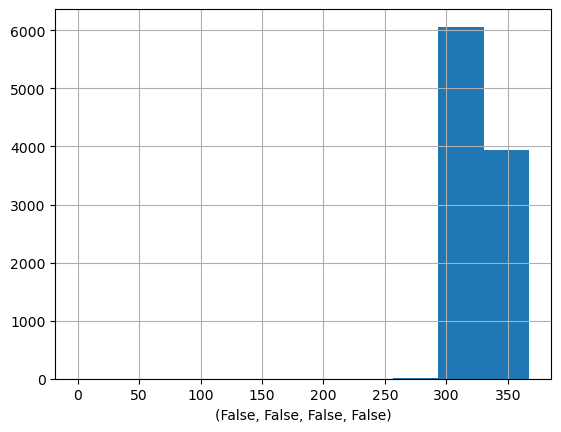

In [12]:
for i in range(len(shuffle_results)):
    shuffle_results.iloc[i].hist();
    plt.xlabel(shuffle_results.index[i])
    plt.show()

In [13]:
# Calculating average per row
shuffle_results_avg = shuffle_results.copy(deep = True).drop(columns = "obs")
shuffle_results_avg['expec'] = shuffle_results_avg.mean(axis=1)
shuffle_results_avg = shuffle_results_avg[["expec"]]
shuffle_results_avg

expec
clinvar cosmic pt_vars gnomad             
False   False  False   True    1095.138100
        True   False   False    112.962900
        False  True    True     309.447300
        True   False   True     377.653000
        False  True    False     92.485800
        True   True    True     106.782900
True    False  False   True      28.975800
                       False      8.720872
               True    True       8.213243
False   True   True    False     31.965500
True    True   True    True       2.975310
        False  True    False      2.660134
        True   False   True       9.983500
               True    False      1.480401
               False   False      3.159545
False   False  False   False    327.564500

In [14]:
obs_and_expec = pd.merge(sets_obs, shuffle_results_avg, left_index = True, right_index = True)
obs_and_expec

obs        expec
clinvar cosmic pt_vars gnomad                   
False   False  False   True    1371  1095.138100
        True   False   False    402   112.962900
        False  True    True     304   309.447300
        True   False   True     153   377.653000
        False  True    False    143    92.485800
        True   True    True      67   106.782900
True    False  False   True      18    28.975800
                       False     17     8.720872
               True    True      16     8.213243
False   True   True    False     14    31.965500
True    True   True    True       7     2.975310
        False  True    False      4     2.660134
        True   False   True       3     9.983500
               True    False      0     1.480401
               False   False      0     3.159545
False   False  False   False      0   327.564500

In [15]:
print(sum(obs_and_expec["obs"]))
print(sum(obs_and_expec["expec"]))

2519
2520.1688050754824


In [16]:
obs_and_expec["deviation"] = obs_and_expec["obs"] - obs_and_expec["expec"]
obs_and_expec["deviation_percent"] = 100 * obs_and_expec["deviation"] / obs_and_expec["obs"]
obs_and_expec["abs_deviation_percent"] = np.abs(obs_and_expec["deviation_percent"])
obs_and_expec

obs        expec   deviation  \
clinvar cosmic pt_vars gnomad                                  
False   False  False   True    1371  1095.138100  275.861900   
        True   False   False    402   112.962900  289.037100   
        False  True    True     304   309.447300   -5.447300   
        True   False   True     153   377.653000 -224.653000   
        False  True    False    143    92.485800   50.514200   
        True   True    True      67   106.782900  -39.782900   
True    False  False   True      18    28.975800  -10.975800   
                       False     17     8.720872    8.279128   
               True    True      16     8.213243    7.786757   
False   True   True    False     14    31.965500  -17.965500   
True    True   True    True       7     2.975310    4.024690   
        False  True    False      4     2.660134    1.339866   
        True   False   True       3     9.983500   -6.983500   
               True    False      0     1.480401   -1.480401   
               False   False      0     3.159545   -3.159545   
False   False  False   False      0   327.564500 -327.564500   

                               deviation_percent  abs_deviation_percent  
clinvar cosmic pt_vars gnomad                                            
False   False  False   True            20.121218              20.121218  
        True   False   False           71.899776              71.899776  
        False  True    True            -1.791875               1.791875  
        True   False   True          -146.832026             146.832026  
        False  True    False           35.324615              35.324615  
        True   True    True           -59.377463              59.377463  
True    False  False   True           -60.976667              60.976667  
                       False           48.700752              48.700752  
               True    True            48.667233              48.667233  
False   True   True    False         -128.325000             128.325000  
True    True   True    True            57.495572              57.495572  
        False  True    False           33.496644              33.496644  
        True   False   True          -232.783333             232.783333  
               True    False                -inf                    inf  
               False   False                -inf                    inf  
False   False  False   False                -inf                    inf

In [17]:
obs_and_expec = obs_and_expec.sort_values(by = "abs_deviation_percent", ascending = False)
obs_and_expec

obs        expec   deviation  \
clinvar cosmic pt_vars gnomad                                  
True    True   True    False      0     1.480401   -1.480401   
               False   False      0     3.159545   -3.159545   
False   False  False   False      0   327.564500 -327.564500   
True    True   False   True       3     9.983500   -6.983500   
False   True   False   True     153   377.653000 -224.653000   
               True    False     14    31.965500  -17.965500   
               False   False    402   112.962900  289.037100   
True    False  False   True      18    28.975800  -10.975800   
False   True   True    True      67   106.782900  -39.782900   
True    True   True    True       7     2.975310    4.024690   
        False  False   False     17     8.720872    8.279128   
               True    True      16     8.213243    7.786757   
False   False  True    False    143    92.485800   50.514200   
True    False  True    False      4     2.660134    1.339866   
False   False  False   True    1371  1095.138100  275.861900   
               True    True     304   309.447300   -5.447300   

                               deviation_percent  abs_deviation_percent  
clinvar cosmic pt_vars gnomad                                            
True    True   True    False                -inf                    inf  
               False   False                -inf                    inf  
False   False  False   False                -inf                    inf  
True    True   False   True          -232.783333             232.783333  
False   True   False   True          -146.832026             146.832026  
               True    False         -128.325000             128.325000  
               False   False           71.899776              71.899776  
True    False  False   True           -60.976667              60.976667  
False   True   True    True           -59.377463              59.377463  
True    True   True    True            57.495572              57.495572  
        False  False   False           48.700752              48.700752  
               True    True            48.667233              48.667233  
False   False  True    False           35.324615              35.324615  
True    False  True    False           33.496644              33.496644  
False   False  False   True            20.121218              20.121218  
               True    True            -1.791875               1.791875

In [18]:
upset_input = sets_long.copy(deep = True).set_index(var_lists)
upset_input = pd.merge(upset_input, obs_and_expec["deviation_percent"], how = "left", left_index = True, right_index = True)
upset_input = upset_input.rename(columns = {"deviation_percent" : "Deviation (%)"})
upset_input["color"] = upset_input["Deviation (%)"] > 0
upset_input

Deviation (%)  color
clinvar cosmic pt_vars gnomad                      
True    True   True    True        57.495572   True
                       True        57.495572   True
        False  True    True        48.667233   True
               False   True       -60.976667  False
               True    True        48.667233   True
...                                      ...    ...
False   False  False   True        20.121218   True
                       True        20.121218   True
                       True        20.121218   True
                       True        20.121218   True
                       True        20.121218   True

[2519 rows x 2 columns]

In [216]:
reordered_upset_input = upset_input.copy(deep = True).reset_index()
reordered_upset_input = reordered_upset_input.rename(columns = {"clinvar" : "ClinVar", "cosmic" : "COSMIC", "pt_vars" : "SPARK", "gnomad" : "gnomAD"})
order = ["SPARK", "ClinVar", "COSMIC", "gnomAD"]
reordered_upset_input = reordered_upset_input[order + ["Deviation (%)", "color"]]
reordered_upset_input = reordered_upset_input.set_index(order)
reordered_upset_input

Deviation (%)  color
SPARK ClinVar COSMIC gnomAD                      
True  True    True   True        57.495572   True
                     True        57.495572   True
              False  True        48.667233   True
False True    False  True       -60.976667  False
True  True    False  True        48.667233   True
...                                    ...    ...
False False   False  True        20.121218   True
                     True        20.121218   True
                     True        20.121218   True
                     True        20.121218   True
                     True        20.121218   True

[2519 rows x 2 columns]

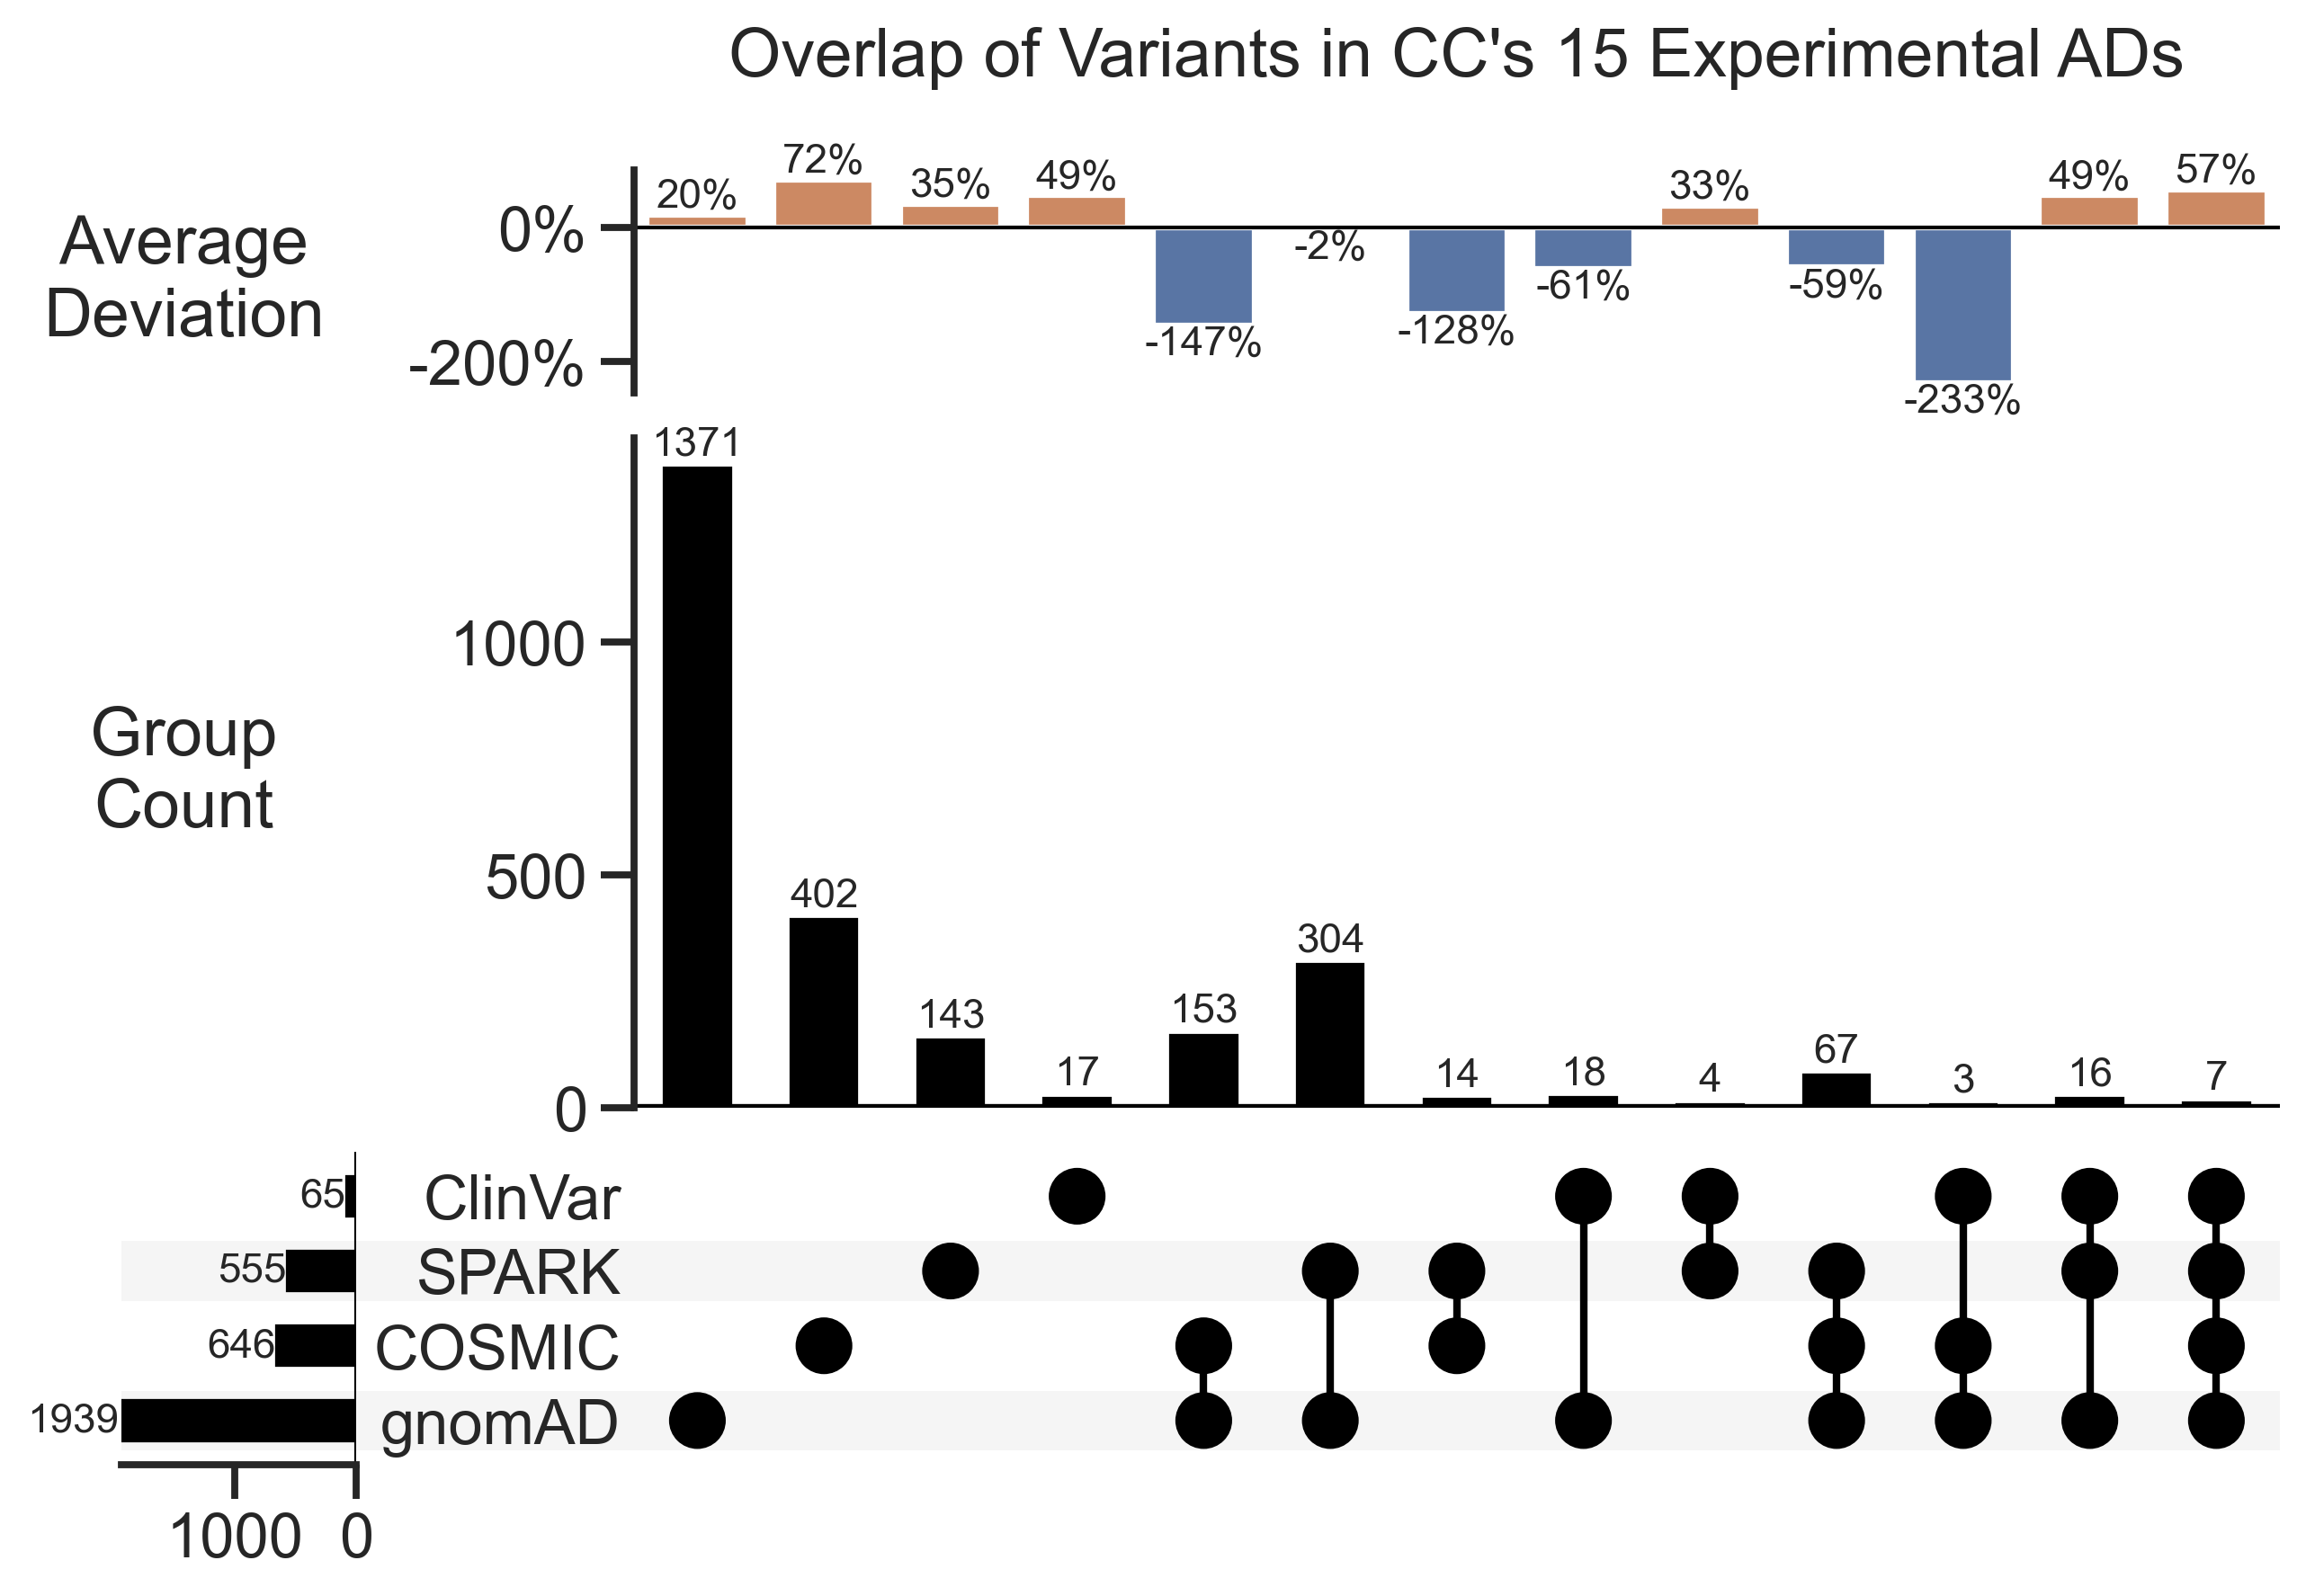

In [276]:
# UpSet plot it!
#fig = plt.figure(figsize=(12, 14))
sns.set(font="Helvetica Neue")
sns.set_theme(rc={'figure.dpi': 300})
sns.set_style('ticks')
sns.set_context('talk')

upset = upsetplot.UpSet(reordered_upset_input, subset_size="count", intersection_plot_elements = 8, 
                        facecolor="black",
                        other_dots_color=(0,0,0,0),
                        #other_dots_color = 0.04,
                        shading_color=0.04, element_size = None, show_counts = True)
upset.add_catplot(value="Deviation (%)", kind="bar", hue="color", legend = False)
plot_result = upset.plot()

plot_result["extra1"].set_ylabel("Average\nDeviation", rotation = 0, labelpad = 60, va = 'center')
plot_result["extra1"].axhline(0, color='black', linewidth=1)
plot_result["extra1"].set_yticks(np.arange(-200, 200, 200), labels = ["-200%", "0%"])
plot_result["extra1"].grid(False)
# Add the count labels
for container in plot_result["extra1"].containers:
    plot_result["extra1"].bar_label(container, 
                                     labels=[f'{round(label.get_height(), 0):.0f}%' for label in container], 
                                     fontsize=11)

plot_result["totals"].grid(False)
plot_result["totals"].axvline(0, color='black', linewidth=1)
for text in plot_result["totals"].texts:  # For counts above the bars
    text.set_fontsize(11)  # Change to desired size

plot_result["intersections"].set_ylabel("Group\nCount", rotation = 0, labelpad = 60, va = 'center')
plot_result["intersections"].grid(False)
plot_result["intersections"].axhline(0, color='black', linewidth=2)
#plot_result["intersections"].set_yticks(np.arange(0, 1500, 300))
# Adjust bar label sizes (if applicable)
for text in plot_result["intersections"].texts:  # For counts beside the bars
    text.set_fontsize(11)  # Change to desired size

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4)

#plot_result["totals"].set_xlabel("Category size")
plt.title("Overlap of Variants in CC's 15 Experimental ADs\n")
plt.savefig("../output_CC_15_ADs_upset_plot.png")
plt.show();

In [267]:
plot_result

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>,
 'extra1': <Axes: title={'center': "Overlap of Variants in CC's 15 Experimental ADs\n"}, xlabel='_bin', ylabel='Average\nDeviation %'>}